In [1]:
# C:\Users\PuDav\OneDrive\桌面\xg model

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [3]:
# import row data
path = os.getcwd()
df = pd.read_csv(path + "\Data\shots_epl_22-23.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'league', 'id', 'minute', 'result', 'X', 'Y', 'xG',
       'player', 'h_a', 'player_id', 'situation', 'season', 'shotType',
       'match_id', 'home_team', 'away_team', 'home_goals', 'away_goals',
       'date', 'player_assisted', 'lastAction'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,league,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,home_team,away_team,home_goals,away_goals,date,player_assisted,lastAction
0,1,EPL,479025,41,SavedShot,0.920,0.512,0.393576,Odsonne Edouard,h,3697,SetPiece,2022,Head,18202,Crystal Palace,Arsenal,0,2,2022-08-05 19:00:00,Joachim Andersen,HeadPass
1,2,EPL,479026,45,BlockedShot,0.851,0.345,0.055732,Odsonne Edouard,h,3697,OpenPlay,2022,RightFoot,18202,Crystal Palace,Arsenal,0,2,2022-08-05 19:00:00,Jordan Ayew,Pass
2,3,EPL,479027,45,BlockedShot,0.921,0.366,0.067060,Odsonne Edouard,h,3697,OpenPlay,2022,RightFoot,18202,Crystal Palace,Arsenal,0,2,2022-08-05 19:00:00,NaN,Rebound
3,4,EPL,479028,46,BlockedShot,0.765,0.488,0.025083,Jeffrey Schlupp,h,757,OpenPlay,2022,LeftFoot,18202,Crystal Palace,Arsenal,0,2,2022-08-05 19:00:00,Jordan Ayew,Pass
4,5,EPL,479030,51,SavedShot,0.911,0.589,0.383124,Eberechi Eze,h,8706,OpenPlay,2022,RightFoot,18202,Crystal Palace,Arsenal,0,2,2022-08-05 19:00:00,Wilfried Zaha,Throughball


In [6]:
#df2 = pd.read_csv('C:/Users/PuDav/OneDrive/桌面/xg model/small.csv')

In [7]:
df['situation'].unique()

array(['SetPiece', 'OpenPlay', 'FromCorner', 'DirectFreekick', 'Penalty'],
      dtype=object)

In [8]:
# exclude penalty kick and freekick
df = df[df['situation'] != 'Penalty']
df = df[df['situation'] != 'DirectFreekick']

In [9]:
def modify_y(y):
    if y < 0.5:
        return y
    else:
        return 1 - y
df['Y_modify'] = df['Y'].apply(modify_y)

In [10]:
# distance to (1, 0.5)    
df['distance'] = np.sqrt((1-df['X'])**2 + (0.5-df['Y_modify'])**2)

# angel between goal line and shot position
df['angle'] = np.arctan((1-df['X'])/(0.5-df['Y_modify']))

In [11]:
df['goal'] = (df['result'] == 'Goal').astype(int)
df.set_index('id', inplace=True)

In [12]:
df.head()

,Unnamed: 0,league,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,home_team,away_team,home_goals,away_goals,date,player_assisted,lastAction,Y_modify,distance,angle,goal
id,,,,,,,,,,,,,,,,,,,,,,,,,
479025,1,EPL,41,SavedShot,0.920,0.512,0.393576,Odsonne Edouard,h,3697,SetPiece,2022,Head,18202,Crystal Palace,Arsenal,0,2,2022-08-05 19:00:00,Joachim Andersen,HeadPass,0.488,0.080895,1.421906,0
479026,2,EPL,45,BlockedShot,0.851,0.345,0.055732,Odsonne Edouard,h,3697,OpenPlay,2022,RightFoot,18202,Crystal Palace,Arsenal,0,2,2022-08-05 19:00:00,Jordan Ayew,Pass,0.345,0.215002,0.765664,0
479027,3,EPL,45,BlockedShot,0.921,0.366,0.067060,Odsonne Edouard,h,3697,OpenPlay,2022,RightFoot,18202,Crystal Palace,Arsenal,0,2,2022-08-05 19:00:00,NaN,Rebound,0.366,0.155554,0.532702,0
479028,4,EPL,46,BlockedShot,0.765,0.488,0.025083,Jeffrey Schlupp,h,757,OpenPlay,2022,LeftFoot,18202,Crystal Palace,Arsenal,0,2,2022-08-05 19:00:00,Jordan Ayew,Pass,0.488,0.235306,1.519777,0
479030,5,EPL,51,SavedShot,0.911,0.589,0.383124,Eberechi Eze,h,8706,OpenPlay,2022,RightFoot,18202,Crystal Palace,Arsenal,0,2,2022-08-05 19:00:00,Wilfried Zaha,Throughball,0.411,0.125865,0.785398,0


In [13]:
df.columns

Index(['Unnamed: 0', 'league', 'minute', 'result', 'X', 'Y', 'xG', 'player',
       'h_a', 'player_id', 'situation', 'season', 'shotType', 'match_id',
       'home_team', 'away_team', 'home_goals', 'away_goals', 'date',
       'player_assisted', 'lastAction', 'Y_modify', 'distance', 'angle',
       'goal'],
      dtype='object')

In [14]:
# check missing values
df.isnull().sum()

Unnamed: 0            0
league                0
minute                0
result                0
X                     0
Y                     0
xG                    0
player                0
h_a                   0
player_id             0
situation             0
season                0
shotType              0
match_id              0
home_team             0
away_team             0
home_goals            0
away_goals            0
date                  0
player_assisted    2128
lastAction            0
Y_modify              0
distance              0
angle                 0
goal                  0
dtype: int64

In [15]:
df['situation'].unique()

array(['SetPiece', 'OpenPlay', 'FromCorner'], dtype=object)

In [16]:
# List of column names to drop
columns_to_drop = ['Unnamed: 0', 'league', 'minute', 'result',
                   'player', 'h_a', 'player_id', 'season',
                   'match_id', 'home_team', 'away_team', 'home_goals', 'away_goals',
                   'date', 'player_assisted', 'xG', 'Y']

In [17]:
df_use = df.drop(columns=columns_to_drop, inplace = False)

In [18]:
df_use.head()

,X,situation,shotType,lastAction,Y_modify,distance,angle,goal
id,,,,,,,,
479025,0.920,SetPiece,Head,HeadPass,0.488,0.080895,1.421906,0
479026,0.851,OpenPlay,RightFoot,Pass,0.345,0.215002,0.765664,0
479027,0.921,OpenPlay,RightFoot,Rebound,0.366,0.155554,0.532702,0
479028,0.765,OpenPlay,LeftFoot,Pass,0.488,0.235306,1.519777,0
479030,0.911,OpenPlay,RightFoot,Throughball,0.411,0.125865,0.785398,0


In [19]:
df_use.shape

(9246, 8)

In [20]:
df_use = pd.get_dummies(df_use, columns=['situation', 'shotType', 'lastAction'])

In [21]:
df_use.head()

,X,Y_modify,distance,angle,goal,situation_FromCorner,situation_OpenPlay,situation_SetPiece,shotType_Head,shotType_LeftFoot,shotType_OtherBodyPart,shotType_RightFoot,lastAction_Aerial,lastAction_BallRecovery,lastAction_BallTouch,lastAction_BlockedPass,lastAction_Card,lastAction_Challenge,lastAction_Chipped,lastAction_Clearance,lastAction_CornerAwarded,lastAction_Cross,lastAction_Dispossessed,lastAction_End,lastAction_Foul,lastAction_Goal,lastAction_HeadPass,lastAction_Interception,lastAction_LayOff,lastAction_None,lastAction_OffsidePass,lastAction_OffsideProvoked,lastAction_Pass,lastAction_Rebound,lastAction_Tackle,lastAction_TakeOn,lastAction_Throughball
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
479025,0.920,0.488,0.080895,1.421906,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
479026,0.851,0.345,0.215002,0.765664,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
479027,0.921,0.366,0.155554,0.532702,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
479028,0.765,0.488,0.235306,1.519777,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
479030,0.911,0.411,0.125865,0.785398,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [22]:
X = df_use.drop(['goal'], axis = 1)
y = df_use['goal']

In [23]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                   test_size=0.25, stratify = y, random_state=1)

train_indices = X_train.index
test_indices = X_test.index

In [24]:
'''
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# Train the model
classifier_logistic.fit(X_train, y_train)

# Prediction of test data
class_result = classifier_logistic.predict(X_test)

xG_result = classifier_logistic.predict_proba(X_test)[:, 1]

data = {'id': test_indices, 'pred_goal': class_result, 'pred_xG': xG_result}
test_result = pd.DataFrame(data)
test_result.set_index('id', inplace = True)

test_result = test_result.merge(df, left_index=True, right_index=True, how='left')

plt.scatter(x = test_result["xG"], y = test_result["pred_xG"])
plt.xlim(0, 1)
plt.ylim(0, 1)
'''

'\nfrom sklearn.linear_model import LogisticRegression\n\n# Logistic Regression\nclassifier_logistic = LogisticRegression()\n\n# Train the model\nclassifier_logistic.fit(X_train, y_train)\n\n# Prediction of test data\nclass_result = classifier_logistic.predict(X_test)\n\nxG_result = classifier_logistic.predict_proba(X_test)[:, 1]\n\ndata = {\'id\': test_indices, \'pred_goal\': class_result, \'pred_xG\': xG_result}\ntest_result = pd.DataFrame(data)\ntest_result.set_index(\'id\', inplace = True)\n\ntest_result = test_result.merge(df, left_index=True, right_index=True, how=\'left\')\n\nplt.scatter(x = test_result["xG"], y = test_result["pred_xG"])\nplt.xlim(0, 1)\nplt.ylim(0, 1)\n'

In [25]:
import xgboost as xgb

classifier_xgb = xgb.XGBClassifier()
classifier_xgb.fit(X_train, y_train)
class_xgb = classifier_xgb.predict(X_test)

In [26]:
# Accuracy of test data
print(classifier_xgb.score(X_test, y_test))

0.8944636678200693


In [27]:
xG_xgb = classifier_xgb.predict_proba(X_test)[:, 1]

In [28]:
data = {'id': test_indices, 'pred_goal': class_xgb, 'pred_xG': xG_xgb}
test_result = pd.DataFrame(data)
test_result.set_index('id', inplace = True)

In [29]:
test_result = test_result.merge(df, left_index=True, right_index=True, how='left')

In [30]:
test_result.head()

,pred_goal,pred_xG,Unnamed: 0,league,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,home_team,away_team,home_goals,away_goals,date,player_assisted,lastAction,Y_modify,distance,angle,goal
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
494294,0,0.080738,2499,EPL,56,MissedShots,0.904,0.484,0.068647,Diego Costa,a,802,FromCorner,2022,Head,18318,Crystal Palace,Wolverhampton Wanderers,2,1,2022-10-18 19:15:00,Daniel Podence,Cross,0.484,0.097324,1.405648,0
480891,0,0.361235,437,EPL,60,BlockedShot,0.890,0.464,0.144005,Tomas Soucek,a,8288,OpenPlay,2022,LeftFoot,18219,Nottingham Forest,West Ham,1,0,2022-08-14 13:00:00,Said Benrahma,Pass,0.464,0.115741,1.254510,0
502546,0,0.008660,4378,EPL,28,MissedShots,0.805,0.402,0.027173,Cheick Oumar Doucoure,h,8666,FromCorner,2022,RightFoot,18386,Crystal Palace,Tottenham,0,4,2023-01-04 20:00:00,NaN,None,0.402,0.218241,1.105100,0
501016,0,0.064470,3742,EPL,79,BlockedShot,0.913,0.618,0.120902,Willian,a,700,OpenPlay,2022,RightFoot,18366,Crystal Palace,Fulham,0,3,2022-12-26 15:00:00,Kenny Tete,Cross,0.382,0.146605,0.635316,0
514517,0,0.006763,6515,EPL,9,MissedShots,0.667,0.976,0.005979,Vitaly Janelt,a,9680,OpenPlay,2022,LeftFoot,18265,Southampton,Brentford,0,2,2023-03-15 19:30:00,NaN,None,0.024,0.580917,0.610444,0


(0.0, 1.0)

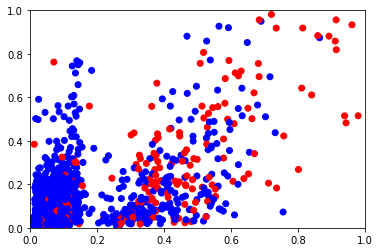

In [31]:
colors = {0: 'blue', 1: 'red'}

plt.scatter(x = test_result["xG"], y = test_result["pred_xG"],
            c = test_result['goal'].map(colors))
plt.xlim(0, 1)
plt.ylim(0, 1)

In [32]:
output = pd.DataFrame({'xG': test_result['pred_xG'], 'result': test_result['goal']})
output["xG_bin"] = pd.cut(output['xG'], bins=np.arange(0, 1.1, 0.1))

output[["xG_bin", "result"]].groupby("xG_bin").agg(["mean", "count", "std"])

result                
                mean count       std
xG_bin                              
(0.0, 0.1]  0.060185  1728  0.237898
(0.1, 0.2]  0.123675   283  0.329793
(0.2, 0.3]  0.234375   128  0.425272
(0.3, 0.4]  0.300000    60  0.462125
(0.4, 0.5]  0.411765    34  0.499554
(0.5, 0.6]  0.387097    31  0.495138
(0.6, 0.7]  0.411765    17  0.507300
(0.7, 0.8]  0.461538    13  0.518875
(0.8, 0.9]  0.555556     9  0.527046
(0.9, 1.0]  0.666667     9  0.500000

In [33]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = classifier_xgb.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

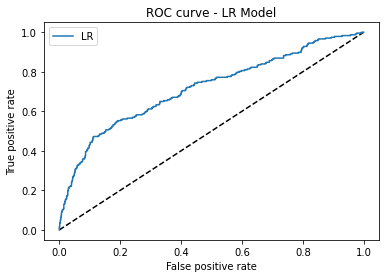

In [34]:
import matplotlib.pyplot as plt

# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [35]:
from sklearn import metrics

print('xgb: AUC score')
print(metrics.auc(fpr_lr,tpr_lr))

xgb: AUC score
0.7158822632301358


In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0] # true negative
    fp = cm[0][1] # false positive
    fn = cm[1][0] # false negative
    tp = cm[1][1] # true positive
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['No','Goal']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [37]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Logistic Regression", confusion_matrix(y_test, classifier_xgb.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Logistic Regression
Accuracy is: 0.8944636678200693
precision is: 0.45569620253164556
recall is: 0.1518987341772152



In [38]:
# plots
test_result.head()

,pred_goal,pred_xG,Unnamed: 0,league,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,home_team,away_team,home_goals,away_goals,date,player_assisted,lastAction,Y_modify,distance,angle,goal
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
494294,0,0.080738,2499,EPL,56,MissedShots,0.904,0.484,0.068647,Diego Costa,a,802,FromCorner,2022,Head,18318,Crystal Palace,Wolverhampton Wanderers,2,1,2022-10-18 19:15:00,Daniel Podence,Cross,0.484,0.097324,1.405648,0
480891,0,0.361235,437,EPL,60,BlockedShot,0.890,0.464,0.144005,Tomas Soucek,a,8288,OpenPlay,2022,LeftFoot,18219,Nottingham Forest,West Ham,1,0,2022-08-14 13:00:00,Said Benrahma,Pass,0.464,0.115741,1.254510,0
502546,0,0.008660,4378,EPL,28,MissedShots,0.805,0.402,0.027173,Cheick Oumar Doucoure,h,8666,FromCorner,2022,RightFoot,18386,Crystal Palace,Tottenham,0,4,2023-01-04 20:00:00,NaN,None,0.402,0.218241,1.105100,0
501016,0,0.064470,3742,EPL,79,BlockedShot,0.913,0.618,0.120902,Willian,a,700,OpenPlay,2022,RightFoot,18366,Crystal Palace,Fulham,0,3,2022-12-26 15:00:00,Kenny Tete,Cross,0.382,0.146605,0.635316,0
514517,0,0.006763,6515,EPL,9,MissedShots,0.667,0.976,0.005979,Vitaly Janelt,a,9680,OpenPlay,2022,LeftFoot,18265,Southampton,Brentford,0,2,2023-03-15 19:30:00,NaN,None,0.024,0.580917,0.610444,0


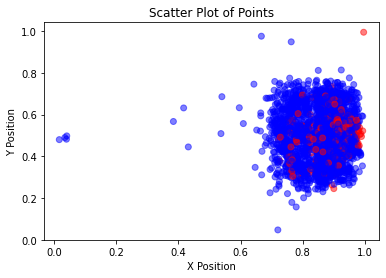

In [39]:
colors = {0: 'blue', 1: 'red'}

# Create a scatter plot
plt.scatter(test_result['X'], test_result['Y'], c = test_result['goal'].map(colors),
            alpha = 0.5)

# Set axis labels
plt.xlabel('X Position')
plt.ylabel('Y Position')

# Set plot title
plt.title('Scatter Plot of Points')

# Show the plot
plt.show()

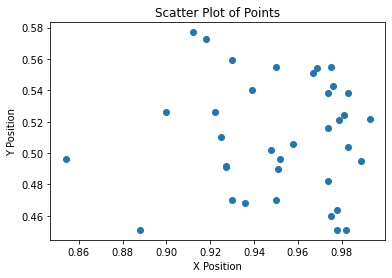

In [40]:
# correctly predicted goals
correctly_pred_goal = test_result[(test_result['pred_goal'] == 1) & (test_result['goal'] == 1)]

plt.scatter(correctly_pred_goal['X'], correctly_pred_goal['Y'])

plt.xlabel('X Position')
plt.ylabel('Y Position')

plt.title('Scatter Plot of Points')

plt.show()

In [41]:
correctly_pred_goal.head()

,pred_goal,pred_xG,Unnamed: 0,league,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,home_team,away_team,home_goals,away_goals,date,player_assisted,lastAction,Y_modify,distance,angle,goal
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
503510,1,0.549920,4503,EPL,46,Goal,0.951,0.490,0.650733,Solly March,h,6049,OpenPlay,2022,LeftFoot,18394,Brighton,Liverpool,3,0,2023-01-14 15:00:00,NaN,Rebound,0.490,0.050010,1.369479,1
508438,1,0.712464,5330,EPL,68,Goal,0.975,0.460,0.612870,James Tomkins,h,530,SetPiece,2022,Head,18424,Crystal Palace,Brighton,1,1,2023-02-11 15:00:00,NaN,None,0.460,0.047170,0.558599,1
520065,1,0.858555,7633,EPL,6,Goal,0.981,0.524,0.911465,Gabriel Jesus,a,5543,OpenPlay,2022,LeftFoot,18510,West Ham,Arsenal,2,2,2023-04-16 13:00:00,Ben White,Pass,0.476,0.030610,0.669639,1
509644,1,0.881525,5714,EPL,48,Goal,0.974,0.482,0.892904,Marcus Tavernier,a,10741,OpenPlay,2022,LeftFoot,18441,Wolverhampton Wanderers,Bournemouth,0,1,2023-02-18 15:00:00,Dominic Solanke,Pass,0.482,0.031623,0.965252,1
498423,1,0.642429,3360,EPL,62,Goal,0.993,0.522,0.811229,Gabriel,a,5613,FromCorner,2022,LeftFoot,18343,Chelsea,Arsenal,0,1,2022-11-06 12:00:00,Bukayo Saka,Cross,0.478,0.023087,0.308051,1


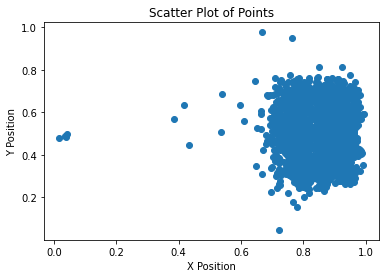

In [42]:
# correctly predicted miss
correctly_pred_miss = test_result[(test_result['pred_goal'] == 0) & (test_result['goal'] == 0)]

plt.scatter(correctly_pred_miss['X'], correctly_pred_miss['Y'])

plt.xlabel('X Position')
plt.ylabel('Y Position')

plt.title('Scatter Plot of Points')

plt.show()

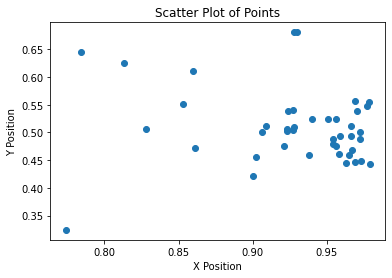

In [43]:
# incorrectly predicted goal
incorrectly_pred_goal = test_result[(test_result['pred_goal'] == 1) & (test_result['goal'] == 0)]

plt.scatter(incorrectly_pred_goal['X'], incorrectly_pred_goal['Y'])

plt.xlabel('X Position')
plt.ylabel('Y Position')

plt.title('Scatter Plot of Points')

plt.show()

In [44]:
incorrectly_pred_goal.head()

,pred_goal,pred_xG,Unnamed: 0,league,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,home_team,away_team,home_goals,away_goals,date,player_assisted,lastAction,Y_modify,distance,angle,goal
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
502180,1,0.881125,4221,EPL,46,MissedShots,0.979,0.443,0.468653,Joelinton,a,87,FromCorner,2022,Head,18382,Arsenal,Newcastle United,0,0,2023-01-03 19:45:00,Fabian Schär,Rebound,0.443,0.060745,0.352990,0
526419,1,0.515389,8924,EPL,39,SavedShot,0.963,0.445,0.633477,Ben Mee,h,1654,OpenPlay,2022,RightFoot,18554,Brentford,West Ham,2,0,2023-05-14 13:00:00,NaN,Rebound,0.445,0.066287,0.592186,0
501969,1,0.749674,4153,EPL,9,SavedShot,0.813,0.625,0.143768,Brennan Johnson,h,10760,OpenPlay,2022,LeftFoot,18378,Nottingham Forest,Chelsea,1,1,2023-01-01 16:30:00,Morgan Gibbs-White,Throughball,0.375,0.224931,0.981561,0
518779,1,0.920443,7416,EPL,93,MissedShots,0.973,0.448,0.592516,Mohamed Salah,h,1250,OpenPlay,2022,RightFoot,18497,Liverpool,Arsenal,2,2,2023-04-09 15:30:00,Andrew Robertson,Chipped,0.448,0.058592,0.478913,0
522770,1,0.608630,8226,EPL,49,BlockedShot,0.969,0.557,0.130643,Bryan Mbeumo,h,6552,FromCorner,2022,Head,18534,Brentford,Nottingham Forest,2,1,2023-04-29 14:00:00,Mathias Jensen,Cross,0.443,0.064885,0.498116,0


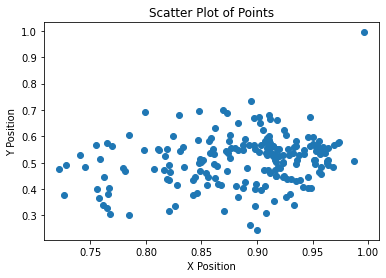

In [45]:
# incorrectly predicted miss
incorrectly_pred_miss = test_result[(test_result['pred_goal'] == 0) & (test_result['goal'] == 1)]

plt.scatter(incorrectly_pred_miss['X'], incorrectly_pred_miss['Y'])

plt.xlabel('X Position')
plt.ylabel('Y Position')

plt.title('Scatter Plot of Points')

plt.show()

In [46]:
incorrectly_pred_miss.head()

,pred_goal,pred_xG,Unnamed: 0,league,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,home_team,away_team,home_goals,away_goals,date,player_assisted,lastAction,Y_modify,distance,angle,goal
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
521393,0,0.023216,7885,EPL,11,Goal,0.942,0.550,0.462551,Lucas Paquetá,a,7365,OpenPlay,2022,Head,18513,Bournemouth,West Ham,0,4,2023-04-23 13:00:00,Vladimir Coufal,Aerial,0.450,0.076577,0.859337,1
505077,0,0.287695,4938,EPL,23,Goal,0.958,0.458,0.477999,Eddie Nketiah,h,6482,FromCorner,2022,Head,18402,Arsenal,Manchester United,3,2,2023-01-22 16:30:00,Granit Xhaka,Cross,0.458,0.059397,0.785398,1
490633,0,0.201933,1888,EPL,7,Goal,0.912,0.575,0.101310,Phil Foden,h,6055,OpenPlay,2022,LeftFoot,18289,Manchester City,Manchester United,6,3,2022-10-02 13:00:00,Bernardo Silva,Cross,0.425,0.115624,0.864984,1
496608,0,0.070093,2967,EPL,72,Goal,0.964,0.555,0.434402,Ben Davies,a,660,FromCorner,2022,Head,18333,Bournemouth,Tottenham,2,3,2022-10-29 14:00:00,Ivan Perisic,Cross,0.445,0.065734,0.579564,1
484941,0,0.056740,1115,EPL,16,Goal,0.912,0.666,0.265576,Anthony Gordon,a,8150,OpenPlay,2022,LeftFoot,18245,Leeds,Everton,1,1,2022-08-30 19:00:00,Alex Iwobi,Pass,0.334,0.187883,0.487453,1
